In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('./kaggle4th/train.csv')
test = pd.read_csv('./kaggle4th/test.csv')
sub = pd.read_csv('./kaggle4th/sample_submission.csv')

In [3]:
print("학습용 데이터 : ", train.shape)
print("테스트용 데이터 : ", test.shape)

학습용 데이터 :  (26049, 16)
테스트용 데이터 :  (6512, 15)


In [4]:
### 데이터 합치기
### train, test 따로 따로 전처리를 하게 되면 문제 발생 가능성이 있다.
### test에는 income
y = train['income']
test['income']= 'blank'

In [45]:
all_dat = pd.concat([train, test], axis=0) #  행으로 붙이기
print(all_dat.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 6511
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              32561 non-null  int64 
 1   age             32561 non-null  int64 
 2   workclass       32561 non-null  object
 3   fnlwgt          32561 non-null  int64 
 4   education       32561 non-null  object
 5   education_num   32561 non-null  int64 
 6   marital_status  32561 non-null  object
 7   occupation      32561 non-null  object
 8   relationship    32561 non-null  object
 9   race            32561 non-null  object
 10  sex             32561 non-null  object
 11  capital_gain    32561 non-null  int64 
 12  capital_loss    32561 non-null  int64 
 13  hours_per_week  32561 non-null  int64 
 14  native_country  32561 non-null  object
 15  income          32561 non-null  object
dtypes: int64(7), object(9)
memory usage: 4.2+ MB
None


In [6]:
all_dat.value_counts(['income'])

income
<=50K     19744
blank      6512
>50K       6305
dtype: int64

<AxesSubplot:xlabel='income', ylabel='count'>

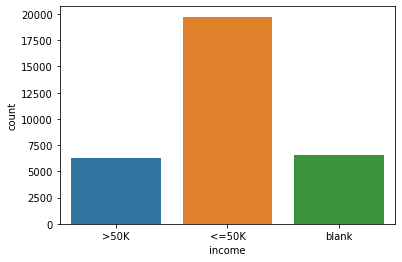

In [7]:
sns.countplot(x='income', data=all_dat)

In [8]:
### 데이터 전처리
### all_dat.loc[행조건, 열조건]

all_dat.loc[ all_dat['income']==">50K", 'target' ] = 1
all_dat.loc[ all_dat['income']=="<=50K", 'target' ] = 0
all_dat.loc[ all_dat['income']=="blank", 'target'] = 999
all_dat['target'] = all_dat['target'].astype("int")
all_dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 6511
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              32561 non-null  int64 
 1   age             32561 non-null  int64 
 2   workclass       32561 non-null  object
 3   fnlwgt          32561 non-null  int64 
 4   education       32561 non-null  object
 5   education_num   32561 non-null  int64 
 6   marital_status  32561 non-null  object
 7   occupation      32561 non-null  object
 8   relationship    32561 non-null  object
 9   race            32561 non-null  object
 10  sex             32561 non-null  object
 11  capital_gain    32561 non-null  int64 
 12  capital_loss    32561 non-null  int64 
 13  hours_per_week  32561 non-null  int64 
 14  native_country  32561 non-null  object
 15  income          32561 non-null  object
 16  target          32561 non-null  int32 
dtypes: int32(1), int64(7), object(9)
memory usage: 5.4+

In [9]:
sel_cat = ['workclass', 'education', 'marital_status',
           'occupation', 'relationship', 'race', 
           'sex', 'native_country' ]

X_cat = all_dat[sel_cat]
y = all_dat['target']

In [10]:
X_dummy = pd.get_dummies(X_cat)
X_dummy

,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6507,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6508,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6509,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6510,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [11]:
all_dat_n = pd.concat([all_dat, X_dummy], axis=1)
all_dat_n

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,...,0,0,0,0,0,0,0,1,0,0
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,...,0,0,0,0,0,0,0,1,0,0
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,...,0,0,0,0,0,0,0,1,0,0
3,3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,...,0,0,0,0,0,0,0,1,0,0
4,4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6507,6507,35,Private,61343,Bachelors,13,Married-civ-spouse,Sales,Husband,White,...,0,0,0,0,0,0,0,1,0,0
6508,6508,41,Self-emp-inc,32185,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,...,0,0,0,0,0,0,0,1,0,0
6509,6509,39,Private,409189,5th-6th,3,Married-civ-spouse,Other-service,Husband,White,...,0,0,0,0,0,0,0,0,0,0
6510,6510,35,Private,180342,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,...,0,0,0,0,0,0,0,1,0,0


In [12]:
sel_cat = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 
           'race', 'sex', 'native_country', 'income']

all_dat_n = all_dat_n.drop(sel_cat, axis=1)

In [15]:
train_n = all_dat_n.loc[(all_dat_n['target']==0) | (all_dat_n['target']==1), :]
test_n = all_dat_n.loc[(all_dat_n['target']==999),:]

In [16]:
print(train_n.shape, test_n.shape)

(26049, 110) (6512, 110)


In [17]:
X = train_n.drop(['target'], axis=1)
y = train_n['target']

test_X = test_n.drop(['target'], axis=1)

In [18]:
print(X.shape, y.shape, test_X.shape)

(26049, 109) (26049,) (6512, 109)


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=77, test_size=0.3)

In [28]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier().fit(X_train, y_train)
pred = model.predict(X_test)
score = cross_val_score(model, X_test, y_test, scoring='f1')
print(score, score.mean())
print(classification_report(y_test, pred, target_names=['<=50K','>50K']))

[0.69252874 0.67536232 0.66167665 0.66761769 0.68804665] 0.6770464074850727
              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      5923
        >50K       0.75      0.63      0.69      1892

    accuracy                           0.86      7815
   macro avg       0.82      0.78      0.80      7815
weighted avg       0.85      0.86      0.86      7815



In [53]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier().fit(X_train, y_train)
pred = model.predict(X_test)
score = cross_val_score(model, X_test, y_test, scoring='roc_auc')
print(score, score.mean())
print(classification_report(y_test, pred, target_names=['<=50K','>50K']))

[0.91468868 0.92170875 0.91747929 0.91180895 0.92111286] 0.9173597057681034
              precision    recall  f1-score   support

       <=50K       0.88      0.95      0.91      5923
        >50K       0.79      0.61      0.69      1892

    accuracy                           0.87      7815
   macro avg       0.84      0.78      0.80      7815
weighted avg       0.86      0.87      0.86      7815



In [31]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X_train, y_train)
pred = model.predict(X_test)
score = cross_val_score(model, X_test, y_test, scoring='f1')
print(score, score.mean())
print(classification_report(y_test, pred, target_names=['<=50K','>50K']))

[0.3828125  0.44528302 0.43830571 0.4039604  0.36852207] 0.4077767393736259
              precision    recall  f1-score   support

       <=50K       0.81      0.97      0.88      5923
        >50K       0.75      0.27      0.40      1892

    accuracy                           0.80      7815
   macro avg       0.78      0.62      0.64      7815
weighted avg       0.79      0.80      0.77      7815



In [46]:
import xgboost as xgb
import lightgbm as lgb
import numpy as np

In [50]:
model = xgb.XGBRegressor(objective='reg:logistic', n_estimators=100)
model.fit(X_train, y_train)

score = cross_val_score(model, X_train, y_train, scoring='roc_auc')
print(np.mean(score))

0.9239185271307182


In [52]:
model = lgb.LGBMRegressor()
model.fit(X_train, y_train)

score = cross_val_score(model, X_train, y_train, scoring='roc_auc')
print(np.mean(score))

0.9225629223986566
